Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2352 - accuracy: 0.9268 - val_loss: 0.0606 - val_accuracy: 0.9809
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0902 - accuracy: 0.9720 - val_loss: 0.0452 - val_accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.0385 - val_accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0593 - accuracy: 0.9820 - val_loss: 0.0365 - val_accuracy: 0.9872
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0524 - accuracy: 0.9837 - val_loss: 0.0351 - val_accuracy: 0.9885


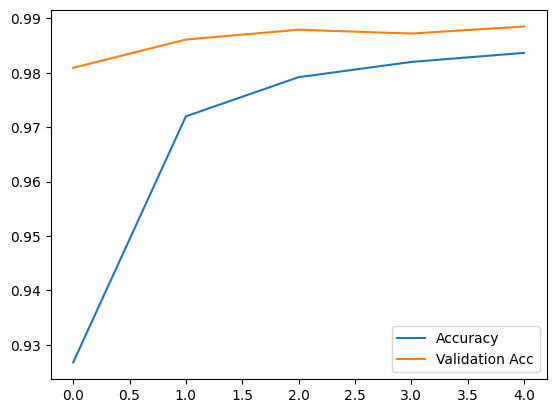

In [1]:
import tensorflow as tf
from keras.utils import normalize
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

# 加载数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# normalize 图片处理（正则化）0-255 -> 0-1
normalized_x_train = normalize(x_train)
normalized_x_test = normalize(x_test)
# one hot 标签处理  从一维数组变成10*10二维数组 独热编码 1 -> [0,1,0,0,...]
one_hot_y_train = tf.one_hot(y_train, 10)
one_hot_y_test = tf.one_hot(y_test, 10)
# flatten
reshaped_x_train = normalized_x_train.reshape(-1, 28, 28, 1)
reshaped_x_test = normalized_x_test.reshape(-1, 28, 28, 1)
# 创建Sequential 模型
model = Sequential()
model.add(Conv2D(10, (5, 5), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(
    optimizer="rmsprop",
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)
# 训练模型
train_result = model.fit(
    reshaped_x_train,
    one_hot_y_train,
    epochs=5,
    validation_data=(reshaped_x_test, one_hot_y_test),
)
# 图形显示训练结果
import matplotlib.pyplot as plt

plt.plot(train_result.history["accuracy"])
plt.plot(train_result.history["val_accuracy"])
plt.legend(["Accuracy", "Validation Acc"])
plt.show()


In [2]:
model.save("debug.h5")


In [ ]:
# copper后
# cv2.imshow("cropped_img",cropped_img)
# cv2.waitKey(0)  # 等待任意时间
# cv2.destroyAllWindows()

gray_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img / 255
gray_img = gray_img.reshape(-1, 28, 28, 1)
# cv2.imshow("gray_img",gray_img)
# cv2.waitKey(0)  # 等待任意时间
# cv2.destroyAllWindows()
(thresh, black_white) = cv2.threshold(
    gray_img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU
)

black_white = cv2.bitwise_not(black_white)
black_white = cv2.resize(black_white, (28, 28))
# cv2.imshow("gray_img",black_white)
# cv2.waitKey(0)  # 等待任意时间
# cv2.destroyAllWindows()

black_white = black_white / 255
black_white = black_white.reshape(-1, 28, 28, 1)
# prediction前


In [5]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("debug.h5")
path = "4.jpg"
img = cv2.imread(path)
img_width = img.shape[1]
img_height = img.shape[0]
col_start = int((img_width - img_height) / 2)
col_end = int(col_start + img_height)
cropped_img = img[:, col_start:col_end, :]

gray_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)


resized = cv2.resize(gray_img, (28, 28))

# 将图像转换为1x28x28的形状并归一化
# normalized = resized.reshape((1, 28, 28)) / 255.0

prediction = model.predict(normalized)

import numpy as np

print(np.argmax(prediction))
# 保存模型
# model.save("mnist_cnn_model_1.h5")


1/1 [==============================] - 0s 64ms/step
5
